In [1]:
from automata.fa.dfa import DFA
import memReq
import utils

We first build automaton `d2`, which corresponds to the automaton from Example xx from the paper.

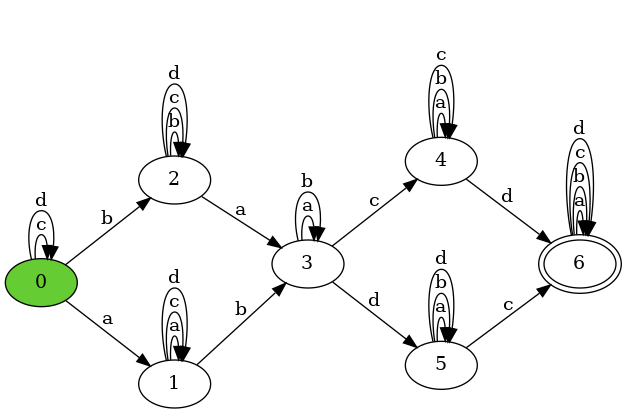

In [2]:
d2 = utils.diamond_generalized(2)
utils.view_dfa(d2)

Here is how to obtain a smallest memory structure that suffices to play optimally for automaton `d2`.
Additionally, outputs the related monotone decomposition of `d2` into chains.

Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Possible with 3 states.
Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Not possible with 2 states.
\Gamma_0 = ['0', '1', '4', '6']
\Gamma_1 = ['2', '3', '4', '6']
\Gamma_2 = ['2', '3', '5', '6']


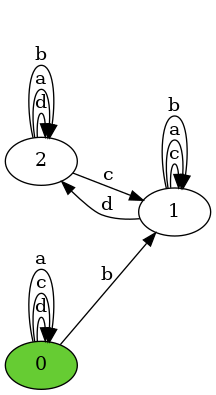

In [3]:
M = memReq.smallest_memory_safety(d2)
utils.view_dfa(M)

More specific functions (which may terminate faster than `smallest_memory_safety()` which binary searches on the optimal value) can find memory structures of a given size, or assert that they do not exist.

In [4]:
f = memReq.monotone(d2)

In [5]:
b, _, _ = f(2) # There should not be a memory structure with 2 states that suffices.
b

SAT encoding finished with 2 states, solving...


False

In [6]:
b, model, sic = f(3) # But it is possible with 3 states.
b

SAT encoding finished with 3 states, solving...


True

\Gamma_0 = ['2', '3', '5', '6']
\Gamma_1 = ['0', '1', '5', '6']
\Gamma_2 = ['2', '3', '4', '6']


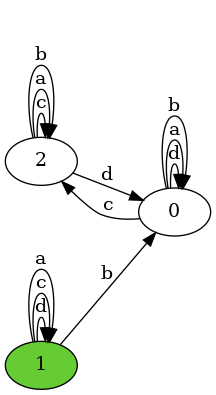

In [7]:
# We can then obtain the automaton from the valid SAT assignment found.
M = memReq.monotone_valuation_to_aut(d2, 3, model, sic)
utils.view_dfa(M)

We generalize this example to a different number of "diamonds".

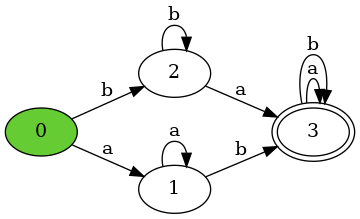

In [8]:
d1 = utils.diamond_generalized(1)
utils.view_dfa(d1)

Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Possible with 2 states.
Trying with 1 states...
SAT encoding finished with 1 states, solving...
Solved! Not possible with 1 states.
\Gamma_0 = ['0', '2', '3']
\Gamma_1 = ['0', '1', '3']


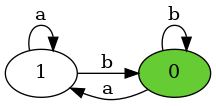

In [9]:
M = memReq.smallest_memory_safety(d1)
utils.view_dfa(M)

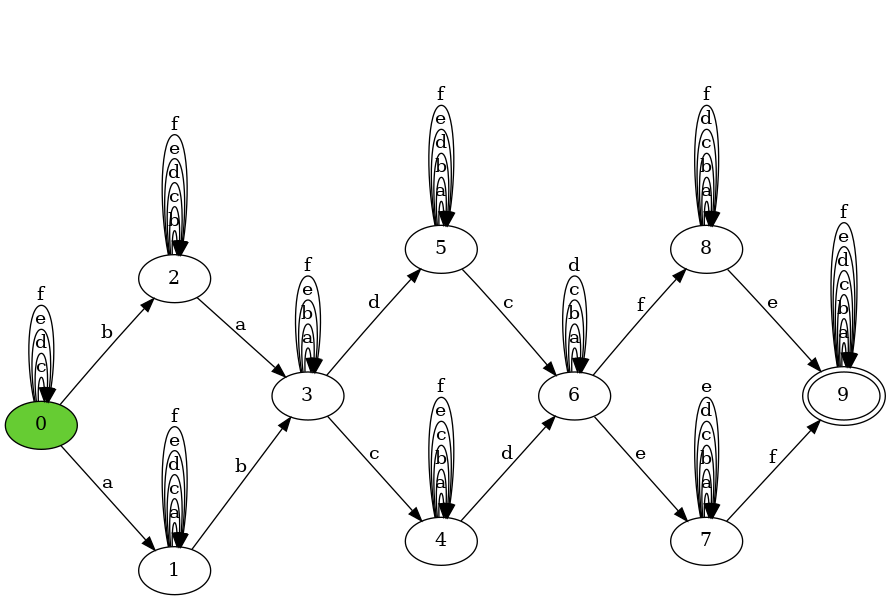

In [10]:
d3 = utils.diamond_generalized(3)
utils.view_dfa(d3)

Trying with 5 states...
SAT encoding finished with 5 states, solving...
Solved! Possible with 5 states.
Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Not possible with 3 states.
Trying with 4 states...
SAT encoding finished with 4 states, solving...
Solved! Not possible with 4 states.
\Gamma_0 = ['1', '3', '4', '6', '8', '9']
\Gamma_1 = ['0', '2', '7', '9']
\Gamma_2 = ['1', '3', '5', '6', '8', '9']
\Gamma_3 = ['1', '3', '4', '6', '7', '9']
\Gamma_4 = ['1', '3', '5', '6', '7', '9']


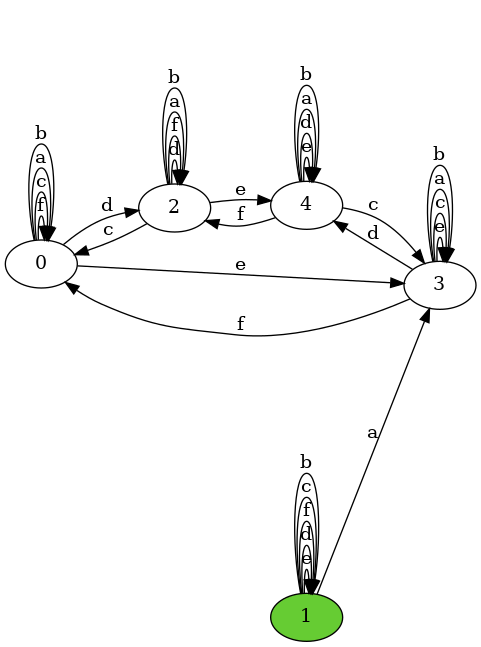

In [11]:
M = memReq.smallest_memory_safety(d3)
utils.view_dfa(M)

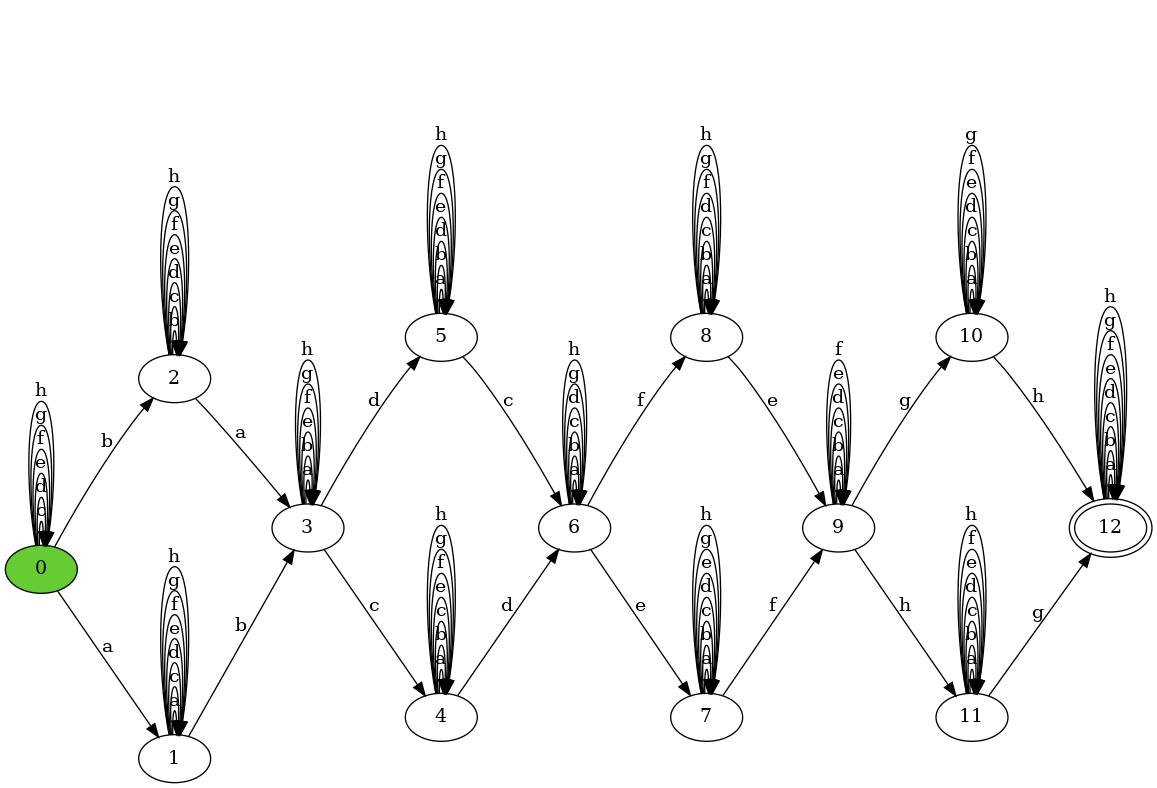

In [12]:
d4 = utils.diamond_generalized(4)
utils.view_dfa(d4)

Trying with 6 states...
SAT encoding finished with 6 states, solving...
Solved! Not possible with 6 states.
Trying with 9 states...
SAT encoding finished with 9 states, solving...
Solved! Possible with 9 states.
Trying with 8 states...
SAT encoding finished with 8 states, solving...
Solved! Possible with 8 states.
Trying with 7 states...
SAT encoding finished with 7 states, solving...
Solved! Not possible with 7 states.
\Gamma_0 = ['12', '3', '5']
\Gamma_1 = ['12', '2']
\Gamma_2 = ['0', '12']
\Gamma_3 = ['10', '12', '4', '6', '7', '9']
\Gamma_4 = ['11', '12', '4', '6', '7', '9']
\Gamma_5 = ['10', '12', '4', '6', '8', '9']
\Gamma_6 = ['1', '12']
\Gamma_7 = ['11', '12', '4', '6', '8', '9']


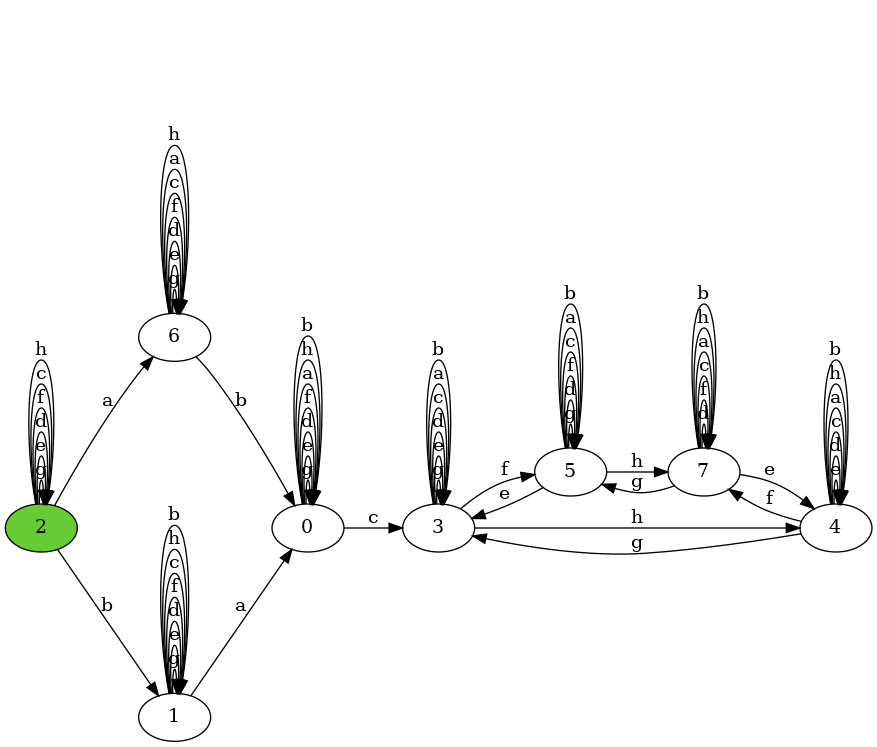

In [13]:
M = memReq.smallest_memory_safety(d4) # Takes a bit more time
utils.view_dfa(M)

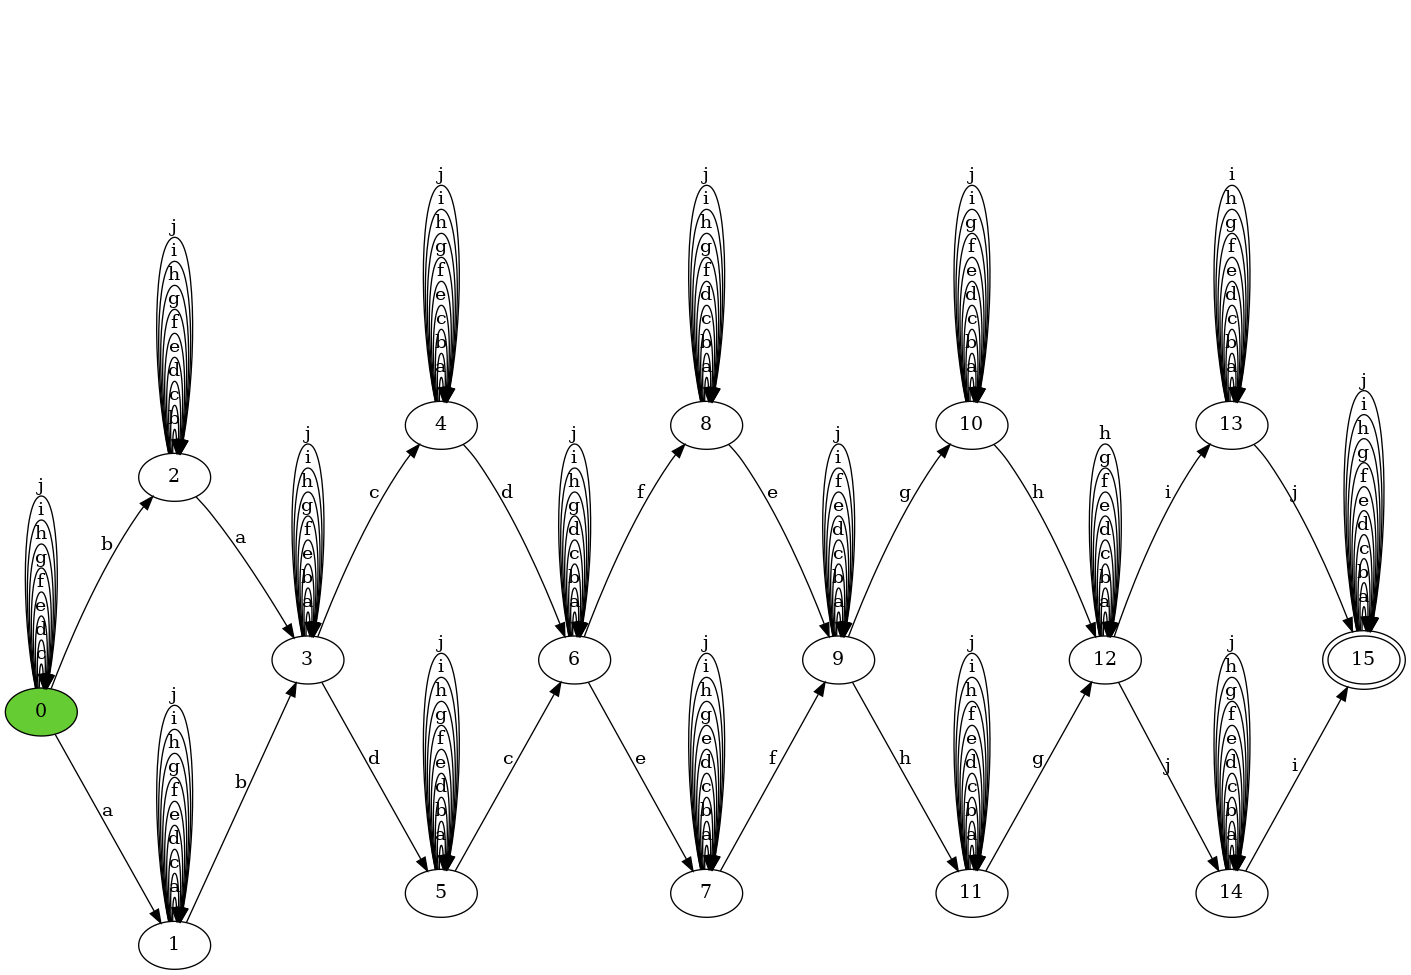

In [14]:
d5 = utils.diamond_generalized(5)
utils.view_dfa(d5)

As `smallest_memory_safety()` takes quite some time on `d5`, we just show that there is a sufficient memory structure with 11 states (with no guarantee on minimality).

In [15]:
f = memReq.monotone(d5)

In [16]:
b, model, x_qi = f(11)
b

SAT encoding finished with 11 states, solving...


True

\Gamma_0 = ['0', '15']
\Gamma_1 = ['11', '12', '13', '15', '7', '9']
\Gamma_2 = ['14', '15', '4']
\Gamma_3 = ['15', '2']
\Gamma_4 = ['15', '5']
\Gamma_5 = ['1', '15']
\Gamma_6 = ['15', '3']
\Gamma_7 = ['14', '15', '6', '8']
\Gamma_8 = ['10', '12', '13', '15', '7', '9']
\Gamma_9 = ['11', '12', '14', '15', '7', '9']
\Gamma_10 = ['10', '12', '14', '15', '7', '9']


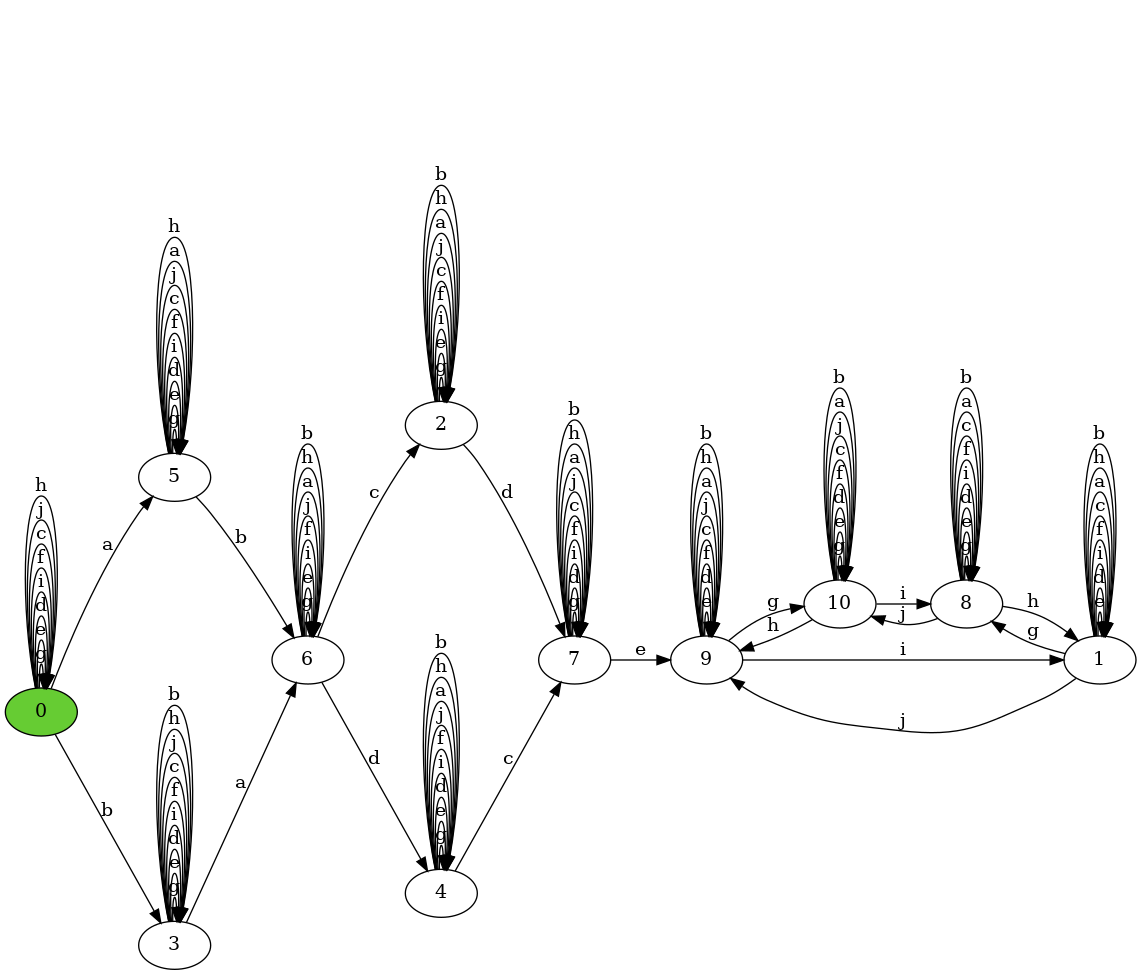

In [17]:
M = memReq.monotone_valuation_to_aut(d5, 11, model, x_qi)
utils.view_dfa(M)